In [94]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import seaborn as sns
import csv
#from datetime import strptime

In [95]:
le = preprocessing.LabelEncoder()

In [96]:
#df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
#df.head(76)
df = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost2')
df.head(10)

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,...,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042,0.250000
1,Petrojarl Varg,NE,1,OC,1,1,2240,EPC,816,0.460000,...,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765,0.240000
2,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,...,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.270000
3,Alima FPU,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,...,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133,0.350000
4,Jangkrik,SEA,4,OC,2,1,8824,EPC,1052,2.676500,...,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068,0.170000
5,Prelude,AUST/NZ,3,IOC,2,1,7814,EPC,2229,11.160000,...,148333.333333,6,5,FLNG,250,1,0.235955,5,0.243158,0.344086
6,CLOV FPSO,AFRICA,3,IOC,2,1,7534,EPC,1383,7.000000,...,198333.333333,4,2,FPSO,1290,4,0.806723,5,0.007954,0.142857
7,Dalia,AFRICA,4,IOC,2,1,4872,EPC,1306,3.400000,...,287000.000000,6,3,FPSO,1360,5,0.836237,2,0.010720,0.176471
8,Girassol,AFRICA,4,IOC,2,1,3103,EPC,823,2.500000,...,246666.666667,5,3,FPSO,1350,1,0.810811,1,0.521264,0.120000
9,Kizomba B,AFRICA,3,IOC,2,1,4756,EPC,1071,0.760000,...,316666.666667,6,1,FPSO,1250,5,0.789474,2,-0.140056,0.133333


In [97]:
print('mean', df['Schedule_Overrun'].mean())
print('median',df['Schedule_Overrun'].median())
print('max',df['Schedule_Overrun'].max())
print('min',df['Schedule_Overrun'].min())
print('std',df['Schedule_Overrun'].std())
Std3_9 =  3.9*df['Schedule_Overrun'].std()
Std3 =  3*df['Schedule_Overrun'].std()
Std2 =  2*df['Schedule_Overrun'].std()
print('2_std',Std2)
print('3_std',Std3)
print('3.9_std',Std3_9)
print(df.shape)
print('describe:',df.describe())

mean 0.24005688069784759
median 0.16480214664074752
max 1.929054054054054
min -0.14387464387464388
std 0.32414525091998675
2_std 0.6482905018399735
3_std 0.9724357527599603
3.9_std 1.2641664785879483
(106, 21)
describe:        Local Content Requirment (H,M,A,L, N)  Lease/ Own   Contract2  \
count                             106.000000  106.000000  106.000000   
mean                                2.971698    1.783019    1.330189   
std                                 1.423995    0.414148    0.764967   
min                                 1.000000    1.000000    0.000000   
25%                                 2.000000    2.000000    1.000000   
50%                                 3.000000    2.000000    1.000000   
75%                                 4.000000    2.000000    1.000000   
max                                 5.000000    2.000000    3.000000   

       Contracting Date  Planned_Duration  Planned_Cost        BOE/day  \
count        106.000000        106.000000    106.000000  

In [98]:
#df[df["Cost_Overrun"]==2.6800000000000006]
df[df["Cost_Overrun"]>Std3_9]


,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
17,Akpo,AFRICA,4,IOC,2,1,5606,TK,1303,2.345000,...,273333.333333,6,4,FPSO,1325,1,0.676829,2,0.072141,1.55
28,Frade,BRAZ,3,IOC,2,1,6014,EPC,909,2.000000,...,117666.666667,3,2,FPSO,1080,1,0.849858,4,0.209021,1.35
33,Espirito Santo,BRAZ,5,IOC,1,3,6153,EPC,787,1.508621,...,105000.000000,3,5,FPSO,1780,1,0.952381,2,0.247776,1.32
66,Atlantis,GOM,3,IOC,2,1,4533,EPC,1492,2.500000,...,230000.000000,5,3,SEMI,2145,3,0.869565,1,0.603887,1.35
70,Thunder Horse,GOM,3,IOC,2,1,4624,EPC,1098,5.000000,...,283333.333333,6,5,SEMI,1830,1,0.882353,4,0.926230,2.68
80,Tahiti Spar,GOM,2,IOC,2,1,5597,EPC,1159,3.500000,...,136666.666667,3,3,SPAR,1280,2,0.914634,2,0.267472,1.80


In [99]:
#df.drop([0,1])
#df.head(10)
print(df.shape)
df = df[df.Cost_Overrun < Std3_9]
print(df.shape)

(106, 21)
(100, 21)


In [100]:
#df.drop([df["Cost_Overrun"]==2.6800000000000006], axis =0)
#df.drop([67,67])
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

mean 0.24672424599740972
median 0.17323529411764704
max 1.1666666666666667
min -0.1290322580645161


In [101]:
df= df.drop('Unit Name', axis = 1)
df.head(10)

,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,NEW,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042,0.250000
1,NE,1,OC,1,1,2240,EPC,816,0.460000,NEW,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765,0.240000
2,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,NEW,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.270000
3,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,NEW,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133,0.350000
4,SEA,4,OC,2,1,8824,EPC,1052,2.676500,NEW,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068,0.170000
5,AUST/NZ,3,IOC,2,1,7814,EPC,2229,11.160000,NEW,148333.333333,6,5,FLNG,250,1,0.235955,5,0.243158,0.344086
6,AFRICA,3,IOC,2,1,7534,EPC,1383,7.000000,NEW,198333.333333,4,2,FPSO,1290,4,0.806723,5,0.007954,0.142857
7,AFRICA,4,IOC,2,1,4872,EPC,1306,3.400000,NEW,287000.000000,6,3,FPSO,1360,5,0.836237,2,0.010720,0.176471
8,AFRICA,4,IOC,2,1,3103,EPC,823,2.500000,NEW,246666.666667,5,3,FPSO,1350,1,0.810811,1,0.521264,0.120000
9,AFRICA,3,IOC,2,1,4756,EPC,1071,0.760000,NEW,316666.666667,6,1,FPSO,1250,5,0.789474,2,-0.140056,0.133333


In [102]:
dataset = df.values
print(dataset.shape)
Y = dataset[:,19]
df= df.drop('Schedule_Overrun', axis = 1)
df= df.drop('Cost_Overrun', axis = 1)
print(Y)

(100, 20)
[0.24999999999999994 0.24 0.2699999999999999 0.35000000000000014
 0.16999999999999996 0.3440860215053763 0.14285714285714285
 0.17647058823529416 0.11999999999999993 0.13333333333333341 0.0 0.0 0.85
 0.4 0.0 0.08888888888888896 0.3 0.5000000000000001 -0.03333333333333333
 0.5700000000000003 0.13333333333333322 0.32352941176470584
 0.012027952212040005 0.3333333333333333 0.4112903225806451
 0.3846153846153846 0.3846153846153846 0.0 0.004184100418409952
 0.275528416 0.2538461538461537 0.971383147853736 0.00554235946159946
 0.3076923076923076 0.19999999999999996 0.31099999999999994
 0.3600000000000001 0.62 0.9487179487179487 0.36974789915966394
 0.6000000000000001 0.7 0.0 0.1924686192468619 0.24999999999999994
 0.0781671159029651 0.20000000000000004 0.04086956521739138
 0.044000000000000004 0.38888888888888884 0.98 0.3999999999999999
 0.08333333333333341 0.08333333333333341 0.0 0.8500000000000002 0.0
 1.1666666666666667 0.04086956521739138 0.3235294117647059
 0.2499999999999999 

In [103]:

# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
df.head(10)


,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_Conv,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP
0,5,2,1,4350,259,0.400000,40000.000000,1,2,30,...,0,1,0,0,0,1,0,0,0,0
1,1,1,1,2240,816,0.460000,65833.333333,2,2,84,...,0,1,0,0,0,1,0,0,0,0
2,3,1,3,5922,702,0.598425,87500.000000,2,3,825,...,0,1,0,0,0,1,0,0,0,0
3,2,2,1,5720,994,1.133000,100000.000000,3,1,600,...,0,1,0,1,0,0,0,0,0,0
4,4,2,1,8824,1052,2.676500,79400.000000,2,2,120,...,0,1,0,1,0,0,0,0,0,0
5,3,2,1,7814,2229,11.160000,148333.333333,6,5,250,...,0,1,0,0,1,0,0,0,0,0
6,3,2,1,7534,1383,7.000000,198333.333333,4,2,1290,...,0,1,0,0,0,1,0,0,0,0
7,4,2,1,4872,1306,3.400000,287000.000000,6,3,1360,...,0,1,0,0,0,1,0,0,0,0
8,4,2,1,3103,823,2.500000,246666.666667,5,3,1350,...,0,1,0,0,0,1,0,0,0,0
9,3,2,1,4756,1071,0.760000,316666.666667,6,1,1250,...,0,1,0,0,0,1,0,0,0,0


In [104]:
print(df.shape)

(100, 39)


In [105]:
df['Cost_Overrun'] = Y

print(df.shape)

(100, 40)


In [106]:
print(Y)

[0.24999999999999994 0.24 0.2699999999999999 0.35000000000000014
 0.16999999999999996 0.3440860215053763 0.14285714285714285
 0.17647058823529416 0.11999999999999993 0.13333333333333341 0.0 0.0 0.85
 0.4 0.0 0.08888888888888896 0.3 0.5000000000000001 -0.03333333333333333
 0.5700000000000003 0.13333333333333322 0.32352941176470584
 0.012027952212040005 0.3333333333333333 0.4112903225806451
 0.3846153846153846 0.3846153846153846 0.0 0.004184100418409952
 0.275528416 0.2538461538461537 0.971383147853736 0.00554235946159946
 0.3076923076923076 0.19999999999999996 0.31099999999999994
 0.3600000000000001 0.62 0.9487179487179487 0.36974789915966394
 0.6000000000000001 0.7 0.0 0.1924686192468619 0.24999999999999994
 0.0781671159029651 0.20000000000000004 0.04086956521739138
 0.044000000000000004 0.38888888888888884 0.98 0.3999999999999999
 0.08333333333333341 0.08333333333333341 0.0 0.8500000000000002 0.0
 1.1666666666666667 0.04086956521739138 0.3235294117647059
 0.2499999999999999 0.07142857

In [107]:
df

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
0,5,2,1,4350,259,0.400000,40000.000000,1,2,30,...,1,0,0,0,1,0,0,0,0,0.25
1,1,1,1,2240,816,0.460000,65833.333333,2,2,84,...,1,0,0,0,1,0,0,0,0,0.24
2,3,1,3,5922,702,0.598425,87500.000000,2,3,825,...,1,0,0,0,1,0,0,0,0,0.27
3,2,2,1,5720,994,1.133000,100000.000000,3,1,600,...,1,0,1,0,0,0,0,0,0,0.35
4,4,2,1,8824,1052,2.676500,79400.000000,2,2,120,...,1,0,1,0,0,0,0,0,0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,2,1,2398,1040,1.450000,216666.666667,5,3,1160,...,1,0,0,0,0,0,0,0,1,0.0434483
102,1,2,1,1885,915,1.000000,93333.333333,2,3,990,...,1,0,0,0,0,0,0,0,1,0
103,3,2,1,7571,1529,4.000000,79166.666667,2,5,1580,...,1,0,0,0,0,0,0,0,1,0.375
104,1,2,1,504,1548,3.900000,283333.333333,6,2,350,...,1,0,0,0,0,0,0,0,1,0.0769231


In [108]:
pd.to_numeric(df['Cost_Overrun'])
df['Cost_Overrun'].astype(str).astype(float)
#df['Schedule_Overrun']
df['Cost_Overrun'] = pd.to_numeric(df['Cost_Overrun'],errors='coerce')
df.dtypes['Cost_Overrun']


dtype('float64')

In [109]:
df2=df
df2

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
0,5,2,1,4350,259,0.400000,40000.000000,1,2,30,...,1,0,0,0,1,0,0,0,0,0.250000
1,1,1,1,2240,816,0.460000,65833.333333,2,2,84,...,1,0,0,0,1,0,0,0,0,0.240000
2,3,1,3,5922,702,0.598425,87500.000000,2,3,825,...,1,0,0,0,1,0,0,0,0,0.270000
3,2,2,1,5720,994,1.133000,100000.000000,3,1,600,...,1,0,1,0,0,0,0,0,0,0.350000
4,4,2,1,8824,1052,2.676500,79400.000000,2,2,120,...,1,0,1,0,0,0,0,0,0,0.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,2,1,2398,1040,1.450000,216666.666667,5,3,1160,...,1,0,0,0,0,0,0,0,1,0.043448
102,1,2,1,1885,915,1.000000,93333.333333,2,3,990,...,1,0,0,0,0,0,0,0,1,0.000000
103,3,2,1,7571,1529,4.000000,79166.666667,2,5,1580,...,1,0,0,0,0,0,0,0,1,0.375000
104,1,2,1,504,1548,3.900000,283333.333333,6,2,350,...,1,0,0,0,0,0,0,0,1,0.076923


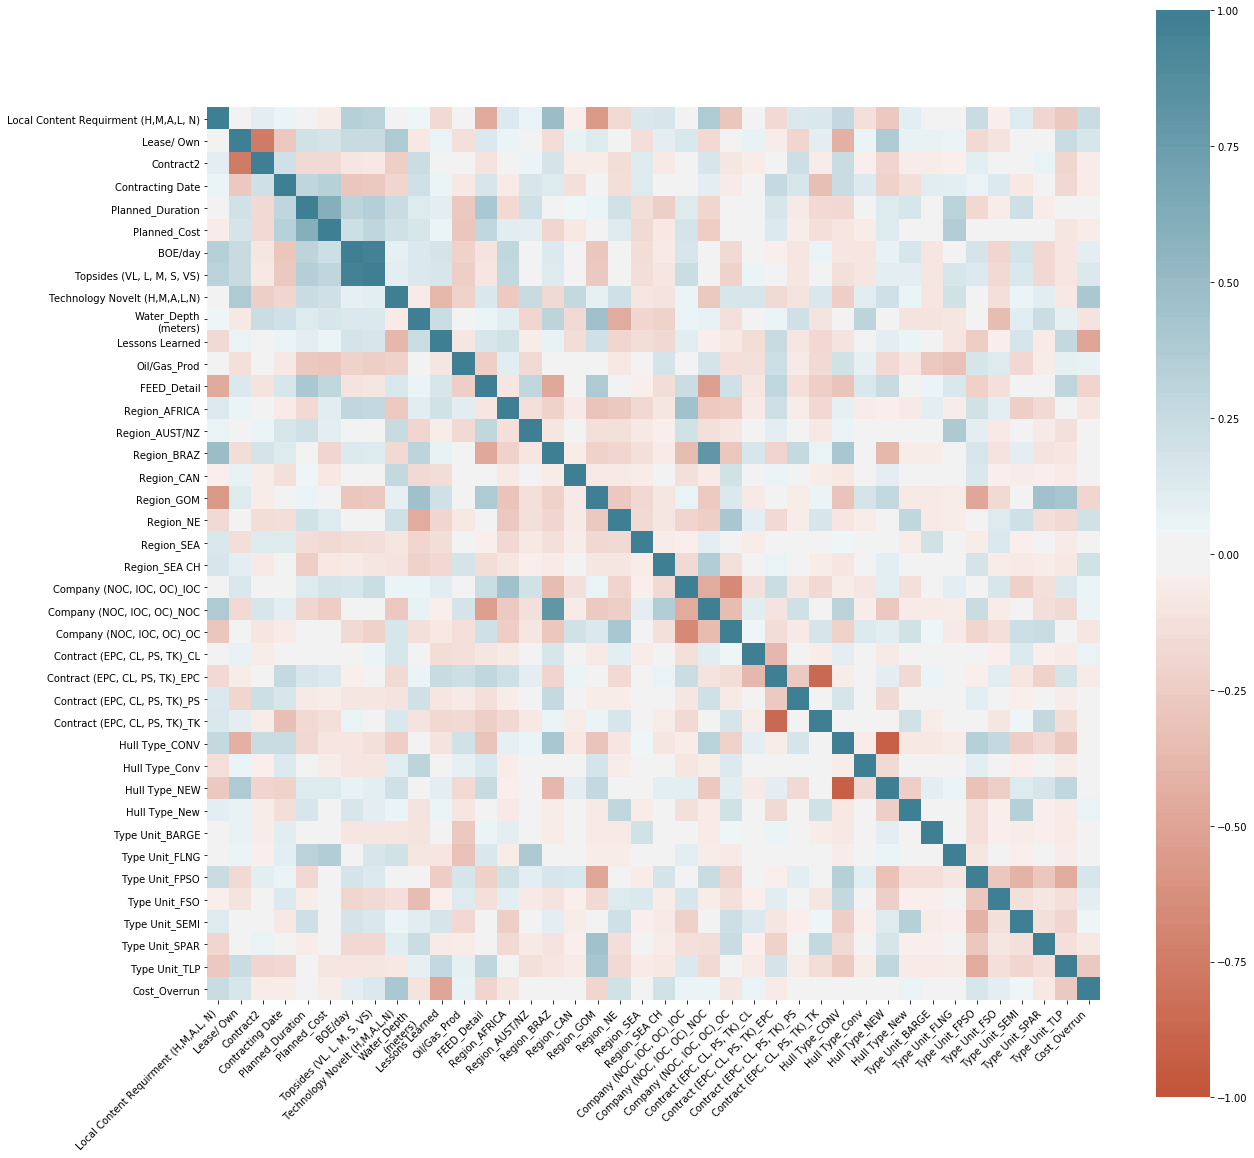

In [110]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

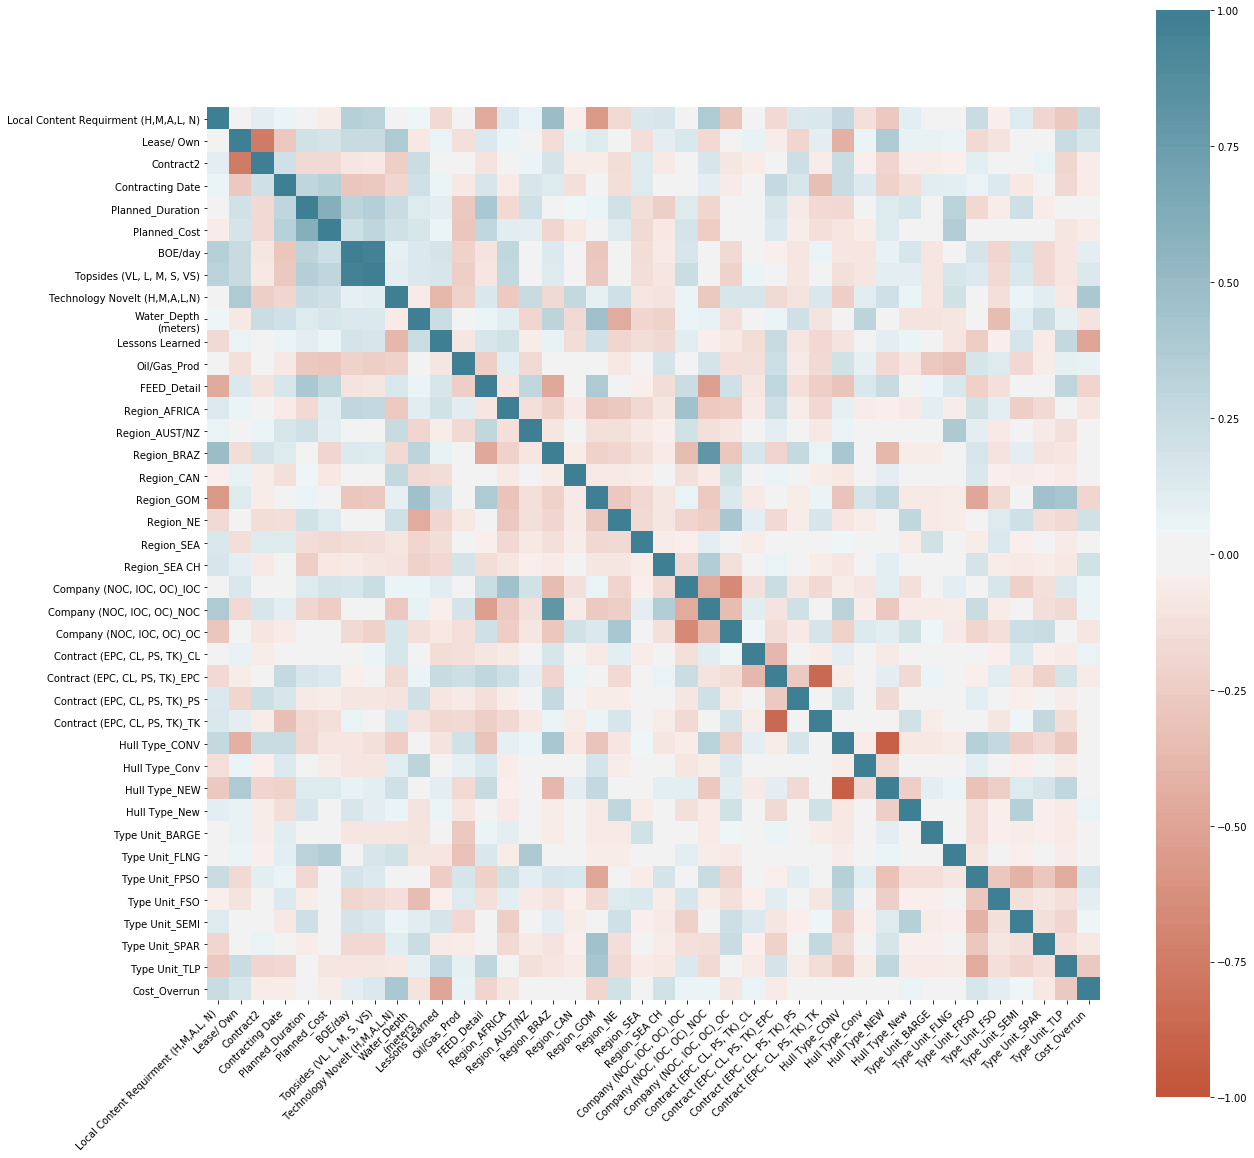

In [111]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [112]:
df.corr(method ='pearson')

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
"Local Content Requirment (H,M,A,L, N)",1.000000,0.015110,0.088040,0.047709,0.000483,-0.049144,0.341154,0.324801,0.013143,0.039657,...,-0.271790,0.104320,0.004968,0.003495,0.242217,-0.041016,0.131470,-0.194828,-0.273345,0.244920
Lease/ Own,0.015110,1.000000,-0.751790,-0.268660,0.194618,0.183506,0.257303,0.251590,0.383214,-0.085738,...,0.383886,0.075869,0.075869,0.053376,-0.166218,-0.110338,0.020282,-0.021356,0.248825,0.163213
Contract2,0.088040,-0.751790,1.000000,0.209152,-0.159524,-0.156456,-0.089405,-0.084697,-0.233036,0.241759,...,-0.209497,-0.061843,-0.061843,-0.043508,0.109231,0.017408,0.038575,0.065762,-0.202823,-0.057445
Contracting Date,0.047709,-0.268660,0.209152,1.000000,0.292690,0.333165,-0.295519,-0.276249,-0.189578,0.198667,...,-0.217228,-0.146448,0.109889,0.102309,0.063929,0.135892,-0.084996,0.023250,-0.183056,-0.055043
Planned_Duration,0.000483,0.194618,-0.159524,0.292690,1.000000,0.608773,0.311707,0.358682,0.244381,0.120431,...,0.122508,0.157749,-0.024917,0.323844,-0.180095,-0.057559,0.216992,-0.052888,0.035721,0.014427
Planned_Cost,-0.049144,0.183506,-0.156456,0.333165,0.608773,1.000000,0.220174,0.295534,0.209317,0.166921,...,0.126659,-0.038872,-0.021206,0.362536,0.026056,-0.026919,-0.026745,0.022981,-0.092409,-0.060450
BOE/day,0.341154,0.257303,-0.089405,-0.295519,0.311707,0.220174,1.000000,0.958478,0.081325,0.147270,...,0.075234,0.157545,-0.101627,-0.000288,0.180987,-0.188664,0.181146,-0.186437,-0.101732,0.097509
"Topsides (VL, L, M, S, VS)",0.324801,0.251590,-0.084697,-0.276249,0.358682,0.295534,0.958478,1.000000,0.106531,0.146338,...,0.105564,0.098321,-0.088957,0.167988,0.136448,-0.159463,0.151445,-0.183624,-0.087013,0.148283
"Technology Novelt (H,M,A,L,N)",0.013143,0.383214,-0.233036,-0.189578,0.244381,0.209317,0.081325,0.106531,1.000000,-0.065035,...,0.195810,0.053995,-0.107990,0.189934,0.030261,-0.139320,0.052926,0.111456,-0.078704,0.399182
Water_Depth\n(meters),0.039657,-0.085738,0.241759,0.198667,0.120431,0.166921,0.147270,0.146338,-0.065035,1.000000,...,-0.017189,-0.115711,-0.110277,-0.094404,-0.035717,-0.356008,0.116232,0.238703,0.085888,-0.109398


In [113]:
dataset = df.values

In [114]:
dataset


array([[5.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.24      ],
       [3.        , 1.        , 3.        , ..., 0.        , 0.        ,
        0.27      ],
       ...,
       [3.        , 2.        , 1.        , ..., 0.        , 1.        ,
        0.375     ],
       [1.        , 2.        , 1.        , ..., 0.        , 1.        ,
        0.07692308],
       [5.        , 2.        , 1.        , ..., 0.        , 1.        ,
        0.07797271]])

In [115]:
X = dataset[:,0:39]

In [116]:
X

array([[5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [3., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [5., 2., 1., ..., 0., 0., 1.]])

In [117]:
Y = dataset[:,39]

In [118]:
Y

array([ 0.25      ,  0.24      ,  0.27      ,  0.35      ,  0.17      ,
        0.34408602,  0.14285714,  0.17647059,  0.12      ,  0.13333333,
        0.        ,  0.        ,  0.85      ,  0.4       ,  0.        ,
        0.08888889,  0.3       ,  0.5       , -0.03333333,  0.57      ,
        0.13333333,  0.32352941,  0.01202795,  0.33333333,  0.41129032,
        0.38461538,  0.38461538,  0.        ,  0.0041841 ,  0.27552842,
        0.25384615,  0.97138315,  0.00554236,  0.30769231,  0.2       ,
        0.311     ,  0.36      ,  0.62      ,  0.94871795,  0.3697479 ,
        0.6       ,  0.7       ,  0.        ,  0.19246862,  0.25      ,
        0.07816712,  0.2       ,  0.04086957,  0.044     ,  0.38888889,
        0.98      ,  0.4       ,  0.08333333,  0.08333333,  0.        ,
        0.85      ,  0.        ,  1.16666667,  0.04086957,  0.32352941,
        0.25      ,  0.07142857,  0.43487859,  0.        ,  0.95      ,
        0.        ,  0.        ,  0.        ,  0.33      ,  0.73

In [119]:
from sklearn import preprocessing

In [120]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [121]:
X_scale

array([[1.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ]])

In [122]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [123]:
#Y_scale

In [124]:
from sklearn.feature_extraction import DictVectorizer

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [127]:
print(X.shape)
print(Y.shape)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

(100, 39)
(100,)


In [128]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(70, 39) (15, 39) (15, 39) (70,) (15,) (15,)


In [129]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [130]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [132]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(39, input_dim=39, activation='relu'))
	model2.add(Dense(78, activation='relu'))
	model2.add(Dense(39, activation='relu'))
	model2.add(Dense(7, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 18.89%
accuracy: 16.67%
accuracy: 17.78%
accuracy: 16.67%
accuracy: 18.89%
accuracy: 18.89%
accuracy: 20.00%
accuracy: 17.78%
accuracy: 18.89%
accuracy: 15.56%
18.00% (+/- 1.30%)


In [133]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(39, activation='sigmoid', input_shape=(39,)),
        Dense(78, activation='sigmoid'),
        Dense(39, activation='sigmoid'),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 70 samples, validate on 15 samples
Epoch 1/400
70/70 [==============================] - 1s 9ms/step - loss: 0.2675 - accuracy: 0.0000e+00 - val_loss: 0.2128 - val_accuracy: 0.0000e+00
Epoch 2/400
70/70 [==============================] - 0s 367us/step - loss: 0.2557 - accuracy: 0.0000e+00 - val_loss: 0.2024 - val_accuracy: 0.0000e+00
Epoch 3/400
70/70 [==============================] - 0s 334us/step - loss: 0.2444 - accuracy: 0.0000e+00 - val_loss: 0.1922 - val_accuracy: 0.0000e+00
Epoch 4/400
70/70 [==============================] - 0s 327us/step - loss: 0.2334 - accuracy: 0.0000e+00 - val_loss: 0.1825 - val_accuracy: 0.0000e+00
Epoch 5/400
70/70 [==============================] - 0s 294us/step - loss: 0.2229 - accuracy: 0.0000e+00 - val_loss: 0.1733 - val_accuracy: 0.0000e+00
Epoch 6/400
70/70 [==============================] - 0s 271us/step - loss: 0.2128 - accuracy: 0.0000e+00 - val_loss: 0.1644 - val_accuracy: 0.0000e+00
Epoch 7/400
70/70 [==============================] -

Epoch 57/400
70/70 [==============================] - 0s 293us/step - loss: 0.0778 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 58/400
70/70 [==============================] - 0s 286us/step - loss: 0.0776 - accuracy: 0.1714 - val_loss: 0.0577 - val_accuracy: 0.1333
Epoch 59/400
70/70 [==============================] - 0s 283us/step - loss: 0.0773 - accuracy: 0.1714 - val_loss: 0.0577 - val_accuracy: 0.1333
Epoch 60/400
70/70 [==============================] - 0s 309us/step - loss: 0.0771 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 61/400
70/70 [==============================] - 0s 281us/step - loss: 0.0769 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 62/400
70/70 [==============================] - 0s 297us/step - loss: 0.0767 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 63/400
70/70 [==============================] - 0s 285us/step - loss: 0.0765 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy:

Epoch 114/400
70/70 [==============================] - 0s 264us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 115/400
70/70 [==============================] - 0s 262us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 116/400
70/70 [==============================] - 0s 259us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 117/400
70/70 [==============================] - 0s 263us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 118/400
70/70 [==============================] - 0s 258us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 119/400
70/70 [==============================] - 0s 280us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 120/400
70/70 [==============================] - 0s 267us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_ac

70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 171/400
70/70 [==============================] - 0s 295us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 172/400
70/70 [==============================] - 0s 329us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 173/400
70/70 [==============================] - 0s 300us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 174/400
70/70 [==============================] - 0s 325us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 175/400
70/70 [==============================] - 0s 302us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 176/400
70/70 [==============================] - 0s 322us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333

70/70 [==============================] - 0s 320us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 227/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 228/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 229/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 230/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 231/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 232/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 293us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 283/400
70/70 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 284/400
70/70 [==============================] - 0s 294us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 285/400
70/70 [==============================] - 0s 292us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 286/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 287/400
70/70 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 288/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 339/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 340/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 341/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 342/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 343/400
70/70 [==============================] - 0s 313us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 344/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 395/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 396/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 397/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 398/400
70/70 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 399/400
70/70 [==============================] - 0s 300us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 400/400
70/70 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 270us/step - loss: 0.0770 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 51/400
70/70 [==============================] - 0s 268us/step - loss: 0.0768 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 52/400
70/70 [==============================] - 0s 270us/step - loss: 0.0766 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 53/400
70/70 [==============================] - 0s 270us/step - loss: 0.0764 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 54/400
70/70 [==============================] - 0s 267us/step - loss: 0.0762 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 55/400
70/70 [==============================] - 0s 270us/step - loss: 0.0760 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 56/400
70/70 [==============================] - 0s 278us/step - loss: 0.0759 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch

Epoch 107/400
70/70 [==============================] - 0s 267us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 108/400
70/70 [==============================] - 0s 277us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 109/400
70/70 [==============================] - 0s 308us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 110/400
70/70 [==============================] - 0s 288us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 111/400
70/70 [==============================] - 0s 260us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 112/400
70/70 [==============================] - 0s 282us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 113/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_ac

70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 164/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 165/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 166/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 167/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 168/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 169/400
70/70 [==============================] - 0s 262us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333

70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 220/400
70/70 [==============================] - 0s 262us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 221/400
70/70 [==============================] - 0s 254us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 222/400
70/70 [==============================] - 0s 259us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 223/400
70/70 [==============================] - 0s 260us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 224/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 225/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 288us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 276/400
70/70 [==============================] - 0s 258us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 277/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 278/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 279/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 280/400
70/70 [==============================] - 0s 258us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 281/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 332/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 333/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 334/400
70/70 [==============================] - 0s 290us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 335/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 336/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 337/400
70/70 [==============================] - 0s 255us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 261us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 388/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 389/400
70/70 [==============================] - 0s 261us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 390/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 391/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 392/400
70/70 [==============================] - 0s 254us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 393/400
70/70 [==============================] - 0s 291us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

Epoch 44/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 45/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 46/400
70/70 [==============================] - 0s 264us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 47/400
70/70 [==============================] - 0s 272us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 48/400
70/70 [==============================] - 0s 267us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 49/400
70/70 [==============================] - 0s 276us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0594 - val_accuracy: 0.1333
Epoch 50/400
70/70 [==============================] - 0s 276us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0594 - val_accuracy:

Epoch 101/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 102/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 103/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 104/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 105/400
70/70 [==============================] - 0s 253us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 106/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 107/400
70/70 [==============================] - 0s 305us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_ac

70/70 [==============================] - 0s 298us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 158/400
70/70 [==============================] - 0s 274us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 159/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 160/400
70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 161/400
70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 162/400
70/70 [==============================] - 0s 291us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 163/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

70/70 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 214/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 215/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 216/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 217/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 218/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 219/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 270/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 271/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 272/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 273/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 274/400
70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 275/400
70/70 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 326/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 327/400
70/70 [==============================] - 0s 279us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 328/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 329/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 330/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 331/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 382/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 383/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 384/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 385/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 386/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 387/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 266us/step - loss: 0.0745 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 38/400
70/70 [==============================] - 0s 295us/step - loss: 0.0744 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 39/400
70/70 [==============================] - 0s 283us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 40/400
70/70 [==============================] - 0s 273us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 41/400
70/70 [==============================] - 0s 262us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 42/400
70/70 [==============================] - 0s 267us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 43/400
70/70 [==============================] - 0s 273us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch

Epoch 94/400
70/70 [==============================] - 0s 304us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 95/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 96/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 97/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 98/400
70/70 [==============================] - 0s 366us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 99/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 100/400
70/70 [==============================] - 0s 336us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy

70/70 [==============================] - 0s 320us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 151/400
70/70 [==============================] - 0s 334us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 152/400
70/70 [==============================] - 0s 292us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 153/400
70/70 [==============================] - 0s 304us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 154/400
70/70 [==============================] - 0s 296us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 155/400
70/70 [==============================] - 0s 281us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 156/400
70/70 [==============================] - 0s 306us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 207/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 208/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 209/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 210/400
70/70 [==============================] - 0s 263us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 211/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 212/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 263/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 264/400
70/70 [==============================] - 0s 286us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 265/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 266/400
70/70 [==============================] - 0s 261us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 267/400
70/70 [==============================] - 0s 284us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 268/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 319/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 320/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 321/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 322/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 323/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 324/400
70/70 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 375/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 376/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 377/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 378/400
70/70 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 379/400
70/70 [==============================] - 0s 300us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 380/400
70/70 [==============================] - 0s 317us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 284us/step - loss: 0.0890 - accuracy: 0.1714 - val_loss: 0.0644 - val_accuracy: 0.1333
Epoch 31/400
70/70 [==============================] - 0s 273us/step - loss: 0.0882 - accuracy: 0.1714 - val_loss: 0.0639 - val_accuracy: 0.1333
Epoch 32/400
70/70 [==============================] - 0s 270us/step - loss: 0.0875 - accuracy: 0.1714 - val_loss: 0.0634 - val_accuracy: 0.1333
Epoch 33/400
70/70 [==============================] - 0s 270us/step - loss: 0.0868 - accuracy: 0.1714 - val_loss: 0.0629 - val_accuracy: 0.1333
Epoch 34/400
70/70 [==============================] - 0s 284us/step - loss: 0.0861 - accuracy: 0.1714 - val_loss: 0.0625 - val_accuracy: 0.1333
Epoch 35/400
70/70 [==============================] - 0s 316us/step - loss: 0.0855 - accuracy: 0.1714 - val_loss: 0.0621 - val_accuracy: 0.1333
Epoch 36/400
70/70 [==============================] - 0s 288us/step - loss: 0.0850 - accuracy: 0.1714 - val_loss: 0.0617 - val_accuracy: 0.1333
Epoch

Epoch 87/400
70/70 [==============================] - 0s 291us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 88/400
70/70 [==============================] - 0s 274us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 89/400
70/70 [==============================] - 0s 278us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 90/400
70/70 [==============================] - 0s 295us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 91/400
70/70 [==============================] - 0s 279us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 92/400
70/70 [==============================] - 0s 281us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 93/400
70/70 [==============================] - 0s 287us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy:

70/70 [==============================] - 0s 286us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 144/400
70/70 [==============================] - 0s 314us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 145/400
70/70 [==============================] - 0s 289us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 146/400
70/70 [==============================] - 0s 277us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 147/400
70/70 [==============================] - 0s 281us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 148/400
70/70 [==============================] - 0s 295us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 149/400
70/70 [==============================] - 0s 295us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333

70/70 [==============================] - 0s 297us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 200/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 201/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 202/400
70/70 [==============================] - 0s 284us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 203/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 204/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 205/400
70/70 [==============================] - 0s 285us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333

70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 256/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 257/400
70/70 [==============================] - 0s 299us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 258/400
70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 259/400
70/70 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 260/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 261/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 312/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 313/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 314/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 315/400
70/70 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 316/400
70/70 [==============================] - 0s 264us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 317/400
70/70 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 368/400
70/70 [==============================] - 0s 290us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 369/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 370/400
70/70 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 371/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 372/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 373/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0918 - accuracy: 0.1714 - val_loss: 0.0661 - val_accuracy: 0.1333
Epoch 24/400
70/70 [==============================] - 0s 277us/step - loss: 0.0904 - accuracy: 0.1714 - val_loss: 0.0652 - val_accuracy: 0.1333
Epoch 25/400
70/70 [==============================] - 0s 271us/step - loss: 0.0892 - accuracy: 0.1714 - val_loss: 0.0644 - val_accuracy: 0.1333
Epoch 26/400
70/70 [==============================] - 0s 270us/step - loss: 0.0881 - accuracy: 0.1714 - val_loss: 0.0637 - val_accuracy: 0.1333
Epoch 27/400
70/70 [==============================] - 0s 275us/step - loss: 0.0871 - accuracy: 0.1714 - val_loss: 0.0631 - val_accuracy: 0.1333
Epoch 28/400
70/70 [==============================] - 0s 269us/step - loss: 0.0862 - accuracy: 0.1714 - val_loss: 0.0625 - val_accuracy: 0.1333
Epoch 29/400
70/70 [==============================] - 0s 267us/step - loss: 0.0853 - accuracy: 0.1714 - val_loss: 0.0619 - val_accuracy: 0.1333
Epoch

Epoch 80/400
70/70 [==============================] - 0s 278us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 81/400
70/70 [==============================] - 0s 269us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 82/400
70/70 [==============================] - 0s 265us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 83/400
70/70 [==============================] - 0s 267us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 84/400
70/70 [==============================] - 0s 304us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 85/400
70/70 [==============================] - 0s 281us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 86/400
70/70 [==============================] - 0s 267us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy:

70/70 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 137/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 138/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 139/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 140/400
70/70 [==============================] - 0s 306us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 141/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 142/400
70/70 [==============================] - 0s 312us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333

70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 193/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 194/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 195/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 196/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 197/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 198/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333

70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 249/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 250/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 251/400
70/70 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 252/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 253/400
70/70 [==============================] - 0s 307us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 254/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 305/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 306/400
70/70 [==============================] - 0s 295us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 307/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 308/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 309/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 310/400
70/70 [==============================] - 0s 286us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 361/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 362/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 363/400
70/70 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 364/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 365/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 366/400
70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 275us/step - loss: 0.0986 - accuracy: 0.1714 - val_loss: 0.0711 - val_accuracy: 0.1333
Epoch 17/400
70/70 [==============================] - 0s 276us/step - loss: 0.0970 - accuracy: 0.1714 - val_loss: 0.0699 - val_accuracy: 0.1333
Epoch 18/400
70/70 [==============================] - 0s 282us/step - loss: 0.0955 - accuracy: 0.1714 - val_loss: 0.0688 - val_accuracy: 0.1333
Epoch 19/400
70/70 [==============================] - 0s 277us/step - loss: 0.0940 - accuracy: 0.1714 - val_loss: 0.0678 - val_accuracy: 0.1333
Epoch 20/400
70/70 [==============================] - 0s 288us/step - loss: 0.0927 - accuracy: 0.1714 - val_loss: 0.0669 - val_accuracy: 0.1333
Epoch 21/400
70/70 [==============================] - 0s 295us/step - loss: 0.0915 - accuracy: 0.1714 - val_loss: 0.0660 - val_accuracy: 0.1333
Epoch 22/400
70/70 [==============================] - 0s 298us/step - loss: 0.0903 - accuracy: 0.1714 - val_loss: 0.0652 - val_accuracy: 0.1333
Epoch

Epoch 73/400
70/70 [==============================] - 0s 290us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 74/400
70/70 [==============================] - 0s 289us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 75/400
70/70 [==============================] - 0s 289us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 76/400
70/70 [==============================] - 0s 284us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 77/400
70/70 [==============================] - 0s 297us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 78/400
70/70 [==============================] - 0s 322us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 79/400
70/70 [==============================] - 0s 296us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy:

Epoch 130/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 131/400
70/70 [==============================] - 0s 289us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 132/400
70/70 [==============================] - 0s 295us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 133/400
70/70 [==============================] - 0s 288us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 134/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 135/400
70/70 [==============================] - 0s 274us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 136/400
70/70 [==============================] - 0s 282us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_ac

70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 187/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 188/400
70/70 [==============================] - 0s 289us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 189/400
70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 190/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 191/400
70/70 [==============================] - 0s 290us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 192/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 243/400
70/70 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 244/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 245/400
70/70 [==============================] - 0s 281us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 246/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 247/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 248/400
70/70 [==============================] - 0s 282us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 285us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 299/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 300/400
70/70 [==============================] - 0s 287us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 301/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 302/400
70/70 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 303/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 304/400
70/70 [==============================] - 0s 286us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 313us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 355/400
70/70 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 356/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 357/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 358/400
70/70 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 359/400
70/70 [==============================] - 0s 309us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 360/400
70/70 [==============================] - 0s 312us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 306us/step - loss: 0.1230 - accuracy: 0.1714 - val_loss: 0.0892 - val_accuracy: 0.1333
Epoch 11/400
70/70 [==============================] - 0s 282us/step - loss: 0.1189 - accuracy: 0.1714 - val_loss: 0.0860 - val_accuracy: 0.1333
Epoch 12/400
70/70 [==============================] - 0s 289us/step - loss: 0.1151 - accuracy: 0.1714 - val_loss: 0.0831 - val_accuracy: 0.1333
Epoch 13/400
70/70 [==============================] - 0s 283us/step - loss: 0.1117 - accuracy: 0.1714 - val_loss: 0.0805 - val_accuracy: 0.1333
Epoch 14/400
70/70 [==============================] - 0s 281us/step - loss: 0.1086 - accuracy: 0.1714 - val_loss: 0.0781 - val_accuracy: 0.1333
Epoch 15/400
70/70 [==============================] - 0s 274us/step - loss: 0.1058 - accuracy: 0.1714 - val_loss: 0.0760 - val_accuracy: 0.1333
Epoch 16/400
70/70 [==============================] - 0s 269us/step - loss: 0.1032 - accuracy: 0.1714 - val_loss: 0.0742 - val_accuracy: 0.1333
Epoch

Epoch 67/400
70/70 [==============================] - 0s 273us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 68/400
70/70 [==============================] - 0s 271us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 69/400
70/70 [==============================] - 0s 267us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 70/400
70/70 [==============================] - 0s 269us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 71/400
70/70 [==============================] - 0s 264us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 72/400
70/70 [==============================] - 0s 287us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 73/400
70/70 [==============================] - 0s 297us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy:

Epoch 124/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 125/400
70/70 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 126/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 127/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 128/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 129/400
70/70 [==============================] - 0s 291us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 130/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_ac

70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 181/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 182/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 183/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 184/400
70/70 [==============================] - 0s 291us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 185/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 186/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 298us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 237/400
70/70 [==============================] - 0s 292us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 238/400
70/70 [==============================] - 0s 299us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 239/400
70/70 [==============================] - 0s 306us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 240/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 241/400
70/70 [==============================] - 0s 346us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 242/400
70/70 [==============================] - 0s 305us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 284us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 293/400
70/70 [==============================] - 0s 302us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 294/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 295/400
70/70 [==============================] - 0s 276us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 296/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 297/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 298/400
70/70 [==============================] - 0s 292us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 349/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 350/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 351/400
70/70 [==============================] - 0s 320us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 352/400
70/70 [==============================] - 0s 259us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 353/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 354/400
70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 273us/step - loss: 0.2940 - accuracy: 0.0000e+00 - val_loss: 0.2357 - val_accuracy: 0.0000e+00
Epoch 5/400
70/70 [==============================] - 0s 281us/step - loss: 0.2798 - accuracy: 0.0000e+00 - val_loss: 0.2229 - val_accuracy: 0.0000e+00
Epoch 6/400
70/70 [==============================] - 0s 288us/step - loss: 0.2659 - accuracy: 0.0000e+00 - val_loss: 0.2104 - val_accuracy: 0.0000e+00
Epoch 7/400
70/70 [==============================] - 0s 275us/step - loss: 0.2524 - accuracy: 0.0000e+00 - val_loss: 0.1982 - val_accuracy: 0.0000e+00
Epoch 8/400
70/70 [==============================] - 0s 271us/step - loss: 0.2392 - accuracy: 0.0000e+00 - val_loss: 0.1867 - val_accuracy: 0.0000e+00
Epoch 9/400
70/70 [==============================] - 0s 267us/step - loss: 0.2266 - accuracy: 0.0000e+00 - val_loss: 0.1756 - val_accuracy: 0.0000e+00
Epoch 10/400
70/70 [==============================] - 0s 290us/step - loss: 0.2147 - accuracy: 0.0000e+00 

70/70 [==============================] - 0s 267us/step - loss: 0.0766 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 61/400
70/70 [==============================] - 0s 287us/step - loss: 0.0764 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 62/400
70/70 [==============================] - 0s 276us/step - loss: 0.0762 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 63/400
70/70 [==============================] - 0s 276us/step - loss: 0.0760 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 64/400
70/70 [==============================] - 0s 278us/step - loss: 0.0759 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 65/400
70/70 [==============================] - 0s 270us/step - loss: 0.0757 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 66/400
70/70 [==============================] - 0s 278us/step - loss: 0.0756 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch

Epoch 117/400
70/70 [==============================] - 0s 303us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 118/400
70/70 [==============================] - 0s 270us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 119/400
70/70 [==============================] - 0s 268us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 120/400
70/70 [==============================] - 0s 268us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 121/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 122/400
70/70 [==============================] - 0s 285us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 123/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_ac

70/70 [==============================] - 0s 262us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 174/400
70/70 [==============================] - 0s 274us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 175/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 176/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 177/400
70/70 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 178/400
70/70 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 179/400
70/70 [==============================] - 0s 297us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333

70/70 [==============================] - 0s 333us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 230/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 231/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 232/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 233/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 234/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 235/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 286/400
70/70 [==============================] - 0s 281us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 287/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 288/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 289/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 290/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 291/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 342/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 343/400
70/70 [==============================] - 0s 283us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 344/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 345/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 346/400
70/70 [==============================] - 0s 298us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 347/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 398/400
70/70 [==============================] - 0s 305us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 399/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 400/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Train on 70 samples, validate on 15 samples
Epoch 1/400
70/70 [==============================] - 1s 8ms/step - loss: 0.0775 - accuracy: 0.1714 - val_loss: 0.0577 - val_accuracy: 0.1333
Epoch 2/400
70/70 [==============================] - 0s 283us/step - loss: 0.0773 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 3/400
70/70 [==============================] - 0s 289us/step - loss: 0.0770 - accuracy: 0.1714 - val

Epoch 54/400
70/70 [==============================] - 0s 269us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 55/400
70/70 [==============================] - 0s 274us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 56/400
70/70 [==============================] - 0s 283us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 57/400
70/70 [==============================] - 0s 273us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 58/400
70/70 [==============================] - 0s 272us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 59/400
70/70 [==============================] - 0s 274us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 60/400
70/70 [==============================] - 0s 279us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy:

Epoch 111/400
70/70 [==============================] - 0s 308us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 112/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 113/400
70/70 [==============================] - 0s 276us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 114/400
70/70 [==============================] - 0s 283us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 115/400
70/70 [==============================] - 0s 279us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 116/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 117/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_ac

70/70 [==============================] - 0s 286us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 168/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 169/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 170/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 171/400
70/70 [==============================] - 0s 336us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 172/400
70/70 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 173/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 224/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 225/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 226/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 227/400
70/70 [==============================] - 0s 262us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 228/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 229/400
70/70 [==============================] - 0s 285us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 280/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 281/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 282/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 283/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 284/400
70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 285/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 336/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 337/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 338/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 339/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 340/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 341/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 392/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 393/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 394/400
70/70 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 395/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 396/400
70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 397/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

In [134]:
model3.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 90us/step


0.2666666805744171

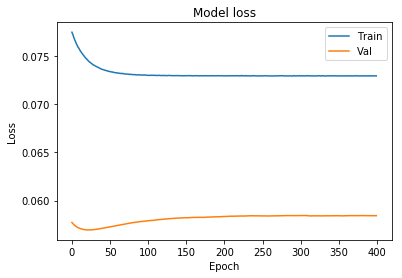

In [135]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [136]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(18,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

In [ ]:
model.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential

In [ ]:
#model = Sequential()
weights = model.get_weights()

In [ ]:
print(weights)

In [ ]:
model.summary()

In [ ]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

In [139]:
df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T2')
df_t.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,...,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042,0.25
1,Petrojarl Varg,NE,1,OC,1,1,2240,EPC,816,0.460000,...,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765,0.24
2,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,...,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.27
3,Alima FPU,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,...,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133,0.35
4,Jangkrik,SEA,4,OC,2,1,8824,EPC,1052,2.676500,...,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068,0.17


In [140]:
df_t= df_t.drop('Unit Name', axis = 1)
df_t= df_t.drop('Schedule_Overrun', axis = 1)
df_t= df_t.drop('Cost_Overrun', axis = 1)

In [141]:
df_t = pd.get_dummies(df_t)
dataset_t = df_t.values

# One-hot encode the data using pandas get_dummies

# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
dataset_t

#Xnew = dataset_t[:,1:19]
#Xnew


array([[5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [3., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [5., 2., 1., ..., 0., 0., 1.]])

In [142]:
dataset_t.shape

(106, 39)

In [148]:
Xnew = dataset_t[:,0:39]
Xnew

array([[5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [3., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [5., 2., 1., ..., 0., 0., 1.]])

In [149]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [163]:

ynew2 = model2.predict(Xnew_scale)
print(Xnew_scale)
print(ynew2)

[[1.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.33333333 ... 0.         0.         0.        ]
 [0.5        0.         1.         ... 0.         0.         0.        ]
 ...
 [0.5        1.         0.33333333 ... 0.         0.         1.        ]
 [0.         1.         0.33333333 ... 0.         0.         1.        ]
 [1.         1.         0.33333333 ... 0.         0.         1.        ]]
[[4.98135984e-01]
 [2.67343700e-01]
 [2.89976716e-01]
 [3.51693064e-01]
 [1.67298794e-01]
 [3.47106248e-01]
 [1.15313321e-01]
 [1.90550983e-01]
 [1.32455677e-01]
 [1.18876725e-01]
 [3.31488550e-02]
 [3.10483873e-02]
 [8.43540251e-01]
 [4.27358687e-01]
 [5.14489412e-03]
 [9.03237164e-02]
 [2.84076989e-01]
 [9.69442129e-02]
 [5.14305651e-01]
 [3.58733237e-02]
 [5.46955347e-01]
 [1.80448979e-01]
 [3.34711373e-01]
 [2.75321603e-02]
 [8.16571414e-02]
 [4.55617666e-01]
 [7.60075152e-01]
 [4.13735092e-01]
 [5.80387831e-01]
 [1.13885701e-02]
 [2.19398141e-02

In [164]:
X_val_Sc = min_max_scaler.fit_transform(X_val)
ynew2_val = model2.predict(X_val_Sc)
print(X_val)
print(ynew2_val)

[[5.00000000e+00 2.00000000e+00 1.00000000e+00 7.21300000e+03
  1.38300000e+03 1.30000000e+00 1.45833333e+05 3.00000000e+00
  1.00000000e+00 1.17000000e+03 2.00000000e+00 9.60000000e-01
  2.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 2.00000000e+00 1.00000000e+00 7.81400000e+03
  2.22900000e+03 1.11600000e+01 1.48333333e+05 6.00000000e+00
  5.00000000e+00 2.50000000e+02 1.00000000e+00 2.35955056e-01
  5.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.000

In [152]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew2[%s] = %s " % (loop,Xnew[loop],loop,ynew2[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [5.00e+00 2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00], ynew2[0] = [0.49813598] 
Xnew[1] = [1.00000000e+00 1.00000000e+00 1.00000000e+00 2.24000000e+03
 8.16000000e+02 4.60000000e-01 6.58333333e+04 2.00000000e+00
 2.00000000e+00 8.40000000e+01 1.00000000e+00 8.65822785e-01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.000

In [153]:
print(ynew2)
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew2_df = pd.DataFrame (ynew2)
ynew2_df.to_excel(writer, '18')
# save the excel file
writer.save()

[[4.98135984e-01]
 [2.67343700e-01]
 [2.89976716e-01]
 [3.51693064e-01]
 [1.67298794e-01]
 [3.47106248e-01]
 [1.15313321e-01]
 [1.90550983e-01]
 [1.32455677e-01]
 [1.18876725e-01]
 [3.31488550e-02]
 [3.10483873e-02]
 [8.43540251e-01]
 [4.27358687e-01]
 [5.14489412e-03]
 [9.03237164e-02]
 [2.84076989e-01]
 [9.69442129e-02]
 [5.14305651e-01]
 [3.58733237e-02]
 [5.46955347e-01]
 [1.80448979e-01]
 [3.34711373e-01]
 [2.75321603e-02]
 [8.16571414e-02]
 [4.55617666e-01]
 [7.60075152e-01]
 [4.13735092e-01]
 [5.80387831e-01]
 [1.13885701e-02]
 [2.19398141e-02]
 [2.92165995e-01]
 [2.87588418e-01]
 [7.91539669e-01]
 [9.56588387e-01]
 [1.30011439e-02]
 [3.26195180e-01]
 [2.32527018e-01]
 [3.40689063e-01]
 [4.00310218e-01]
 [6.40713632e-01]
 [9.25209761e-01]
 [4.27332044e-01]
 [6.19471908e-01]
 [7.29242325e-01]
 [1.94126070e-02]
 [2.13450938e-01]
 [2.97743618e-01]
 [7.91573822e-02]
 [2.12880433e-01]
 [1.24448836e-02]
 [3.77374887e-02]
 [4.27418381e-01]
 [8.37879479e-01]
 [4.03886259e-01]
 [8.757185

In [154]:
ynew3 = model3.predict(Xnew_scale)

In [155]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew3[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [5.00e+00 2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00], ynew3[0] = [0.24084556] 
Xnew[1] = [1.00000000e+00 1.00000000e+00 1.00000000e+00 2.24000000e+03
 8.16000000e+02 4.60000000e-01 6.58333333e+04 2.00000000e+00
 2.00000000e+00 8.40000000e+01 1.00000000e+00 8.65822785e-01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.000

In [156]:
print(ynew3)

[[0.24084556]
 [0.24151206]
 [0.24106419]
 [0.2414935 ]
 [0.24145448]
 [0.24136871]
 [0.24153474]
 [0.24154943]
 [0.24138138]
 [0.24152964]
 [0.24137533]
 [0.24139026]
 [0.24153018]
 [0.24161425]
 [0.24180374]
 [0.24142292]
 [0.24157286]
 [0.24179643]
 [0.2414613 ]
 [0.2415317 ]
 [0.24146214]
 [0.24152061]
 [0.24138382]
 [0.24157685]
 [0.24146527]
 [0.24121234]
 [0.24141648]
 [0.24143049]
 [0.24125853]
 [0.24093252]
 [0.2409598 ]
 [0.24068132]
 [0.24111843]
 [0.24099132]
 [0.24115172]
 [0.24101058]
 [0.24197462]
 [0.24188584]
 [0.2419317 ]
 [0.24205527]
 [0.241557  ]
 [0.24173018]
 [0.24142855]
 [0.2418532 ]
 [0.24145627]
 [0.24174029]
 [0.24153328]
 [0.24159956]
 [0.24163473]
 [0.2415325 ]
 [0.24111447]
 [0.24116698]
 [0.2411429 ]
 [0.24104959]
 [0.24123538]
 [0.24144456]
 [0.24153996]
 [0.24166438]
 [0.24152243]
 [0.24137864]
 [0.24135923]
 [0.2410028 ]
 [0.24176112]
 [0.240978  ]
 [0.24078864]
 [0.24079227]
 [0.24168757]
 [0.24190357]
 [0.24148339]
 [0.2417382 ]
 [0.24166304]
 [0.24

In [158]:
Cost_Pred3 = pd.DataFrame(ynew2)
Cost_Pred3['18-2'] = pd.DataFrame(ynew3)

df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T2')


Cost_Pred3['actual'] = df_t['Cost_Overrun']

Cost_Pred3['Name'] = df_t['Unit Name']
print(Cost_Pred3)

            0      18-2    actual                    Name
0    0.498136  0.240846  0.250000          Bohai Ming Zhu
1    0.267344  0.241512  0.240000          Petrojarl Varg
2    0.289977  0.241064  0.270000  Stybarrow Venture MV16
3    0.351693  0.241493  0.350000               Alima FPU
4    0.167299  0.241454  0.170000                Jangkrik
..        ...       ...       ...                     ...
101  0.013902  0.241986  0.043448                Ursa TLP
102  0.009387  0.241867  0.000000          Ram Powell TLP
103  0.382621  0.241817  0.375000                Big Foot
104  0.066029  0.242172  0.076923             Heidrun TLP
105  0.080538  0.241259  0.077973             Malikai TLP

[106 rows x 4 columns]


In [159]:
Cost_Pred3.to_excel("Cost_Pred3.xlsx")

In [ ]:
dataset

11 Features:
Region
Local Content
Lease/ Own
Planned_Cost
Hull Type
Technology Novelty
Type Unit
Water_Depth 
Lessons Learned
Oil/Gas
FEED Detail

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [ ]:
#Reduce features as per pearson correlation
#X = dataset[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
X = dataset[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]

print(X.shape)

In [ ]:
X

In [ ]:
Y = dataset[:,17]

In [ ]:
Y

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [ ]:
Y

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(13, input_dim=13, activation='sigmoid'))
	model4.add(Dense(26, activation='sigmoid'))
	model4.add(Dense(8, activation='sigmoid'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(26, activation='sigmoid', input_shape=(13,)),
        Dense(13, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model4.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t2 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t2.head()

In [ ]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]
print(Xnew2.shape)
print(Xnew2)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [ ]:
ynew4 = model4.predict(Xnew_scale2)
ynew5 = model5.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew4[loop]))

In [ ]:
print(ynew4)

7 Features:
Region
Local Content
Lease/ Own
Technology Novelty
Type Unit
Lessons Learned
FEED Detail

In [ ]:
#Reduce features further as per pearson correlation
X = dataset[:,[1, 2, 12, 13, 14, 16, 18]]

In [ ]:
Y = dataset[:,19]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model6 = Sequential()
	model6.add(Dense(12, input_dim=7, activation='relu'))
	model6.add(Dense(8, activation='relu'))
	model6.add(Dense(1, activation='sigmoid'))
	# Compile model
	model6.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model6.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model6.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model7 = Sequential([
        Dense(14, activation='sigmoid', input_shape=(7,)),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model7.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model7.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model7.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model6.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t3 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t3.head()

In [ ]:
dataset_t3 = df_t3.values
Xnew3 = dataset_t3[:,[1, 2, 4, 13, 14, 16, 18]]
Xnew3

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew3)

In [ ]:
ynew6 = model6.predict(Xnew_scale2)
ynew7 = model7.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew5[loop]))

In [ ]:
print(ynew6)

In [ ]:
print(type(ynew5))
print(ynew5.shape)
#print(range(ynew5))

#Cost_Pred3 = pd.DataFrame
Sch_Pred3 = pd.DataFrame(ynew1)
Sch_Pred3['18-2'] = pd.DataFrame(ynew3)
Sch_Pred3['13-1'] = pd.DataFrame(ynew4)
Sch_Pred3['13-2'] = pd.DataFrame(ynew5)
Sch_Pred3['7-1'] = pd.DataFrame(ynew6)
Sch_Pred3['7-2'] = pd.DataFrame(ynew7)
Sch_Pred3['actual'] = dataset_t[:,20]

Sch_Pred3['Name'] = df['Unit Name']
print(Sch_Pred3)

In [ ]:
Sch_Pred3.to_excel("Sch_Pred3.xlsx")